<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading 

**Chapter 05 &mdash; Predicting Market Movements with Machine Learning**

## Using Linear Regression for Market Movement Prediction

In [1]:
%matplotlib inline
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

### A Quick Review of Linear Regression

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0, 10)

In [5]:
x

array([  0.        ,   0.20408163,   0.40816327,   0.6122449 ,
         0.81632653,   1.02040816,   1.2244898 ,   1.42857143,
         1.63265306,   1.83673469,   2.04081633,   2.24489796,
         2.44897959,   2.65306122,   2.85714286,   3.06122449,
         3.26530612,   3.46938776,   3.67346939,   3.87755102,
         4.08163265,   4.28571429,   4.48979592,   4.69387755,
         4.89795918,   5.10204082,   5.30612245,   5.51020408,
         5.71428571,   5.91836735,   6.12244898,   6.32653061,
         6.53061224,   6.73469388,   6.93877551,   7.14285714,
         7.34693878,   7.55102041,   7.75510204,   7.95918367,
         8.16326531,   8.36734694,   8.57142857,   8.7755102 ,
         8.97959184,   9.18367347,   9.3877551 ,   9.59183673,
         9.79591837,  10.        ])

In [6]:
np.random.seed(100)

In [7]:
y = x + np.random.standard_normal(len(x))

In [8]:
y

array([ -1.74976547,   0.54676204,   1.56119907,   0.35980886,
         1.79764732,   1.534627  ,   1.44566947,   0.3585281 ,
         1.44315723,   2.09173614,   1.58278934,   2.68006145,
         1.86538454,   3.4699083 ,   3.52986366,   2.95681335,
         2.73402575,   4.49912044,   3.23533377,   2.75923277,
         5.70061431,   5.82731946,   4.23791678,   3.85144181,
         5.08247787,   6.03912302,   6.03712279,   6.87176021,
         5.38804766,   5.97404336,   6.34484859,   4.88331362,
         5.77425994,   7.55114789,   7.68922027,   6.68691022,
         8.53656104,   5.86040358,   6.39870299,   6.72674916,
         7.61882614,   7.6991752 ,   8.57874313,   8.16257147,
        10.27933991,   7.45057785,   8.404445  ,   9.94934449,
         8.18233986,  11.47071387])

In [9]:
reg = np.polyfit(x, y, deg=1)

In [10]:
reg

array([ 0.94612934,  0.22855261])

In [11]:
reg2 = np.polyfit(x, y, deg=2)
reg2

array([-0.01643109,  1.1104402 , -0.03971002])

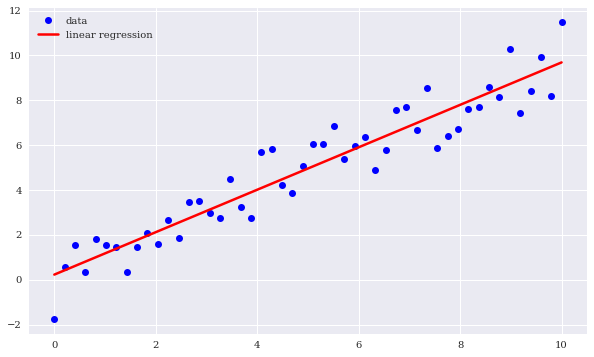

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5,
         label='linear regression')
plt.legend(loc=0)
# plt.savefig('../../images/ch05/lr_plot_1.png')

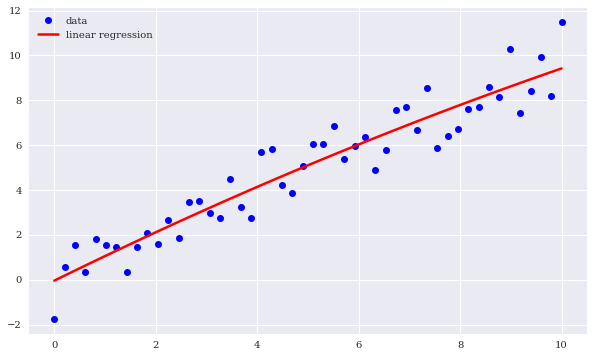

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg2, x), 'r', lw=2.5,
         label='linear regression')
plt.legend(loc=0)
# plt.savefig('../../images/ch05/lr_plot_1.png')

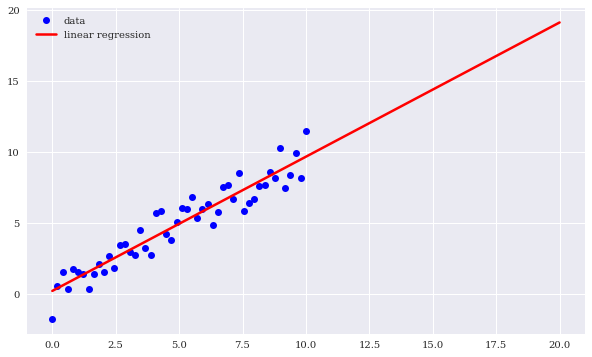

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)  # <1>
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5,
         label='linear regression')
plt.legend(loc=0)
# plt.savefig('../../images/ch05/lr_plot_2.png')

### The Basic Idea for Price Prediction

In [15]:
import numpy as np

In [16]:
x = np.arange(12)

In [17]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [18]:
lags = 3

In [19]:
m = np.zeros((lags + 1, len(x) - lags))
m

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [20]:
for i in range(lags + 1):
    if i == lags:
        m[i] = x[i:]
    else:
        m[i] = x[i:i - lags]

In [21]:
m

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.],
       [  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.]])

In [22]:
m.T

array([[  0.,   1.,   2.,   3.],
       [  1.,   2.,   3.,   4.],
       [  2.,   3.,   4.,   5.],
       [  3.,   4.,   5.,   6.],
       [  4.,   5.,   6.,   7.],
       [  5.,   6.,   7.,   8.],
       [  6.,   7.,   8.,   9.],
       [  7.,   8.,   9.,  10.],
       [  8.,   9.,  10.,  11.]])

In [23]:
m

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.],
       [  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.]])

In [24]:
reg = np.linalg.lstsq(m[:lags].T, m[lags])

In [25]:
reg

(array([-0.66666667,  0.33333333,  1.33333333]),
 array([], dtype=float64),
 2,
 array([  2.94834317e+01,   1.93060965e+00,   1.15715375e-15]))

In [26]:
reg = reg[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [27]:
np.dot(m[:lags].T, reg)

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

### Predicting Index Levels

In [28]:
import pandas as pd

In [29]:
h5 = pd.HDFStore('../data/equities.h5', 'r')

In [30]:
data = pd.DataFrame(h5['data']['^GSPC'])

In [31]:
h5.close()

In [32]:
data = data[(data.index > '2010-1-1') & (data.index < '2016-11-1')]

In [33]:
data.rename(columns={'^GSPC': 'price'}, inplace=True)

In [34]:
lags = 3

In [35]:
m = np.zeros((lags + 1, len(data) - lags))

In [36]:
for i in range(lags + 1):
    if i == lags:
        m[i] = data.price.values[i:]
    else:
        m[i] = data.price.values[i:i - lags]

In [37]:
reg = np.linalg.lstsq(m[:lags].T, m[lags])[0]

In [38]:
reg

array([-0.00116939,  0.0343677 ,  0.96710897])

In [39]:
p = np.dot(m[:lags].T, reg)

In [40]:
data['prediction'] = 0.0

In [41]:
data['prediction'].iloc[lags:] = p

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


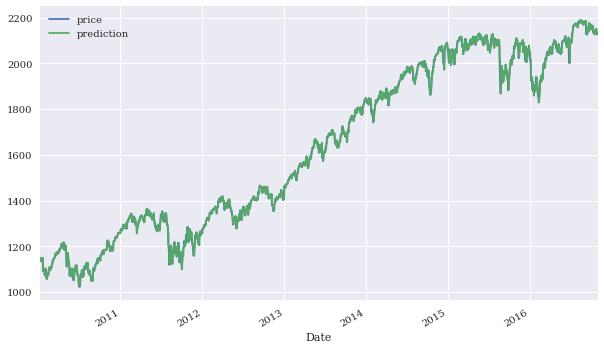

In [42]:
data[['price', 'prediction']].ix[lags:].plot(figsize=(10, 6))
# plt.savefig('../../images/ch05/lr_plot_3.png')

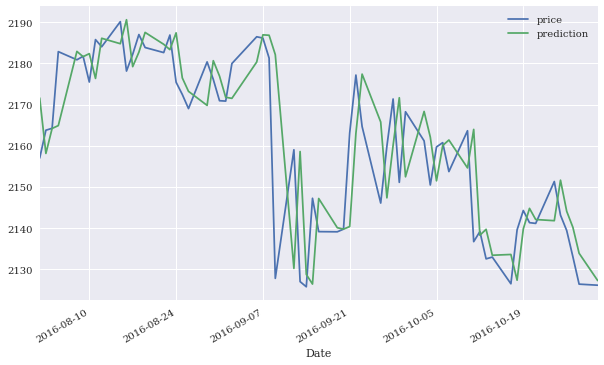

In [43]:
data[['price', 'prediction']][
    data.index > '2016-8-1'].plot(figsize=(10, 6))
# plt.savefig('../../images/ch05/lr_plot_4.png')

### Predicting Future Returns

In [44]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [45]:
data.dropna(inplace=True)

In [46]:
m = np.zeros((lags + 1, len(data) - lags))

In [47]:
for i in range(lags + 1):
    if i == lags:
        m[i] = data.returns.values[i:]
    else:
        m[i] = data.returns.values[i:i - lags]

In [48]:
reg = np.linalg.lstsq(m[:lags].T, m[lags])[0]

In [49]:
reg

array([-0.0615827 ,  0.02076784, -0.04604324])

In [50]:
p = np.dot(m[:lags].T, reg)

In [51]:
data['prediction'] = np.nan

In [52]:
data['prediction'].iloc[lags:] = p

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


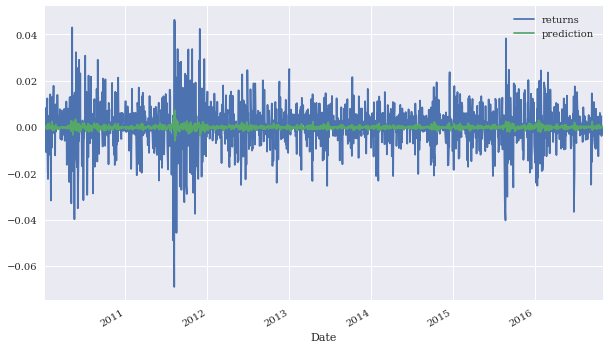

In [53]:
data[['returns', 'prediction']].ix[lags:].plot(figsize=(10, 6))
# plt.savefig('../../images/ch05/lr_plot_5.png')

In [54]:
hits = np.sign(data['returns'].ix[lags:] *
        data['prediction'].ix[lags:]).value_counts()

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [55]:
hits

 1.0    882
-1.0    834
dtype: int64

In [56]:
hits.values[0] / sum(hits)

0

### Prediction Future Market Direction

In [57]:
reg = np.linalg.lstsq(m[:lags].T, np.sign(m[lags]))[0]

In [58]:
reg

array([-1.67058399,  1.61416773, -3.52435904])

In [59]:
p = np.sign(np.dot(m[:lags].T, reg))

In [60]:
data['prediction'] = np.nan

In [61]:
data['prediction'].iloc[lags:] = p

In [62]:
data['prediction'].value_counts()

-1.0    925
 1.0    791
Name: prediction, dtype: int64

In [63]:
hits = np.sign(data['returns'].ix[lags:] *
               data['prediction'].ix[lags:]).value_counts()

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [64]:
hits

 1.0    911
-1.0    805
dtype: int64

In [65]:
hits.values[0] / sum(hits)

0

### Vectorized Backtesting of Regression-based Strategy 

In [66]:
data['strategy'] = data['prediction'] * data['returns']

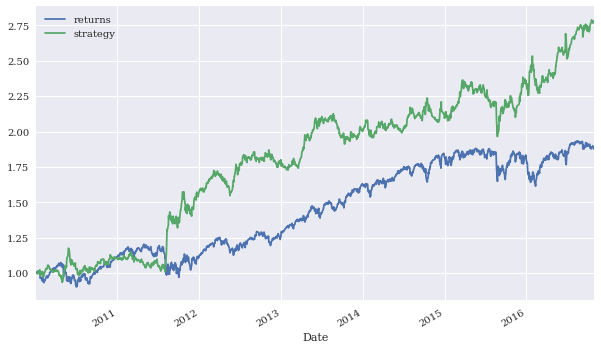

In [67]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(
                                            figsize=(10, 6))
# plt.savefig('../../images/ch05/lr_plot_6.png')

### Generalizing the Approach

In [70]:
import LRVectorBacktester as LR

In [71]:
#from importlib import reload

In [72]:
#reload(LR)

In [73]:
lrbt = LR.LRVectorBacktester('^GSPC', '2010-1-1', '2016-10-31',
                                     10000, 0.0)

In [74]:
lrbt.run_strategy('2010-1-1', '2016-10-31',
                  '2010-1-1', '2016-10-31', lags=3)

(27711.15, 8943.03)

In [75]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
                  '2015-1-1', '2016-10-31', lags=3)

(9480.01, -847.88)

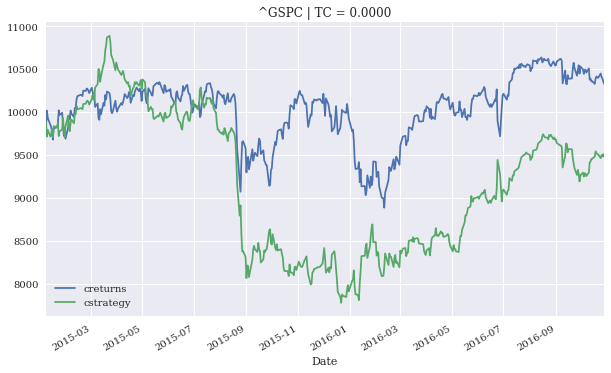

In [76]:
lrbt.plot_results()
# plt.savefig('../../images/ch05/lr_plot_7.png')

In [77]:
lrbt = LR.LRVectorBacktester('^GDAXI', '2010-1-1', '2016-10-31',
                                     10000, 0.001)

In [78]:
lrbt.run_strategy('2010-1-1', '2014-12-31', '2015-1-1',
                          '2016-10-31', lags=4)

(12616.72, 1490.07)

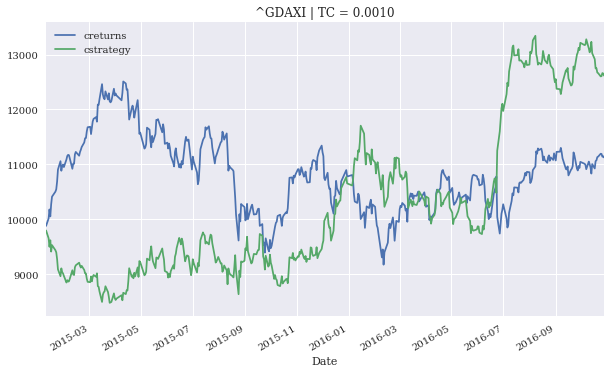

In [79]:
lrbt.plot_results()
# plt.savefig('../../images/ch05/lr_plot_8.png')

## Using Machine Learning for Market Movement Prediction

### Linear Regression with scikit-learn

In [80]:
import numpy as np

In [81]:
x = np.arange(12)

In [82]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [83]:
lags = 3

In [84]:
m = np.zeros((lags + 1, len(x) - lags))

In [85]:
for i in range(lags + 1):
    if i == lags:
        m[i] = x[i:]
    else:
        m[i] = x[i:i - lags]

In [86]:
from sklearn import linear_model

In [87]:
lm = linear_model.LinearRegression()

In [88]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
lm.coef_

array([ 0.33333333,  0.33333333,  0.33333333])

In [90]:
lm.intercept_

2.0000000000000018

In [91]:
lm.predict(m[:lags].T)

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

In [92]:
lm = linear_model.LinearRegression(fit_intercept=False)

In [93]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [94]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [95]:
lm.intercept_

0.0

In [96]:
lm.predict(m[:lags].T)

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

### A Simple Classification Problem

In [97]:
import numpy as np

In [98]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [99]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1])

In [100]:
import matplotlib.pyplot as plt

(-0.2, 1.2)

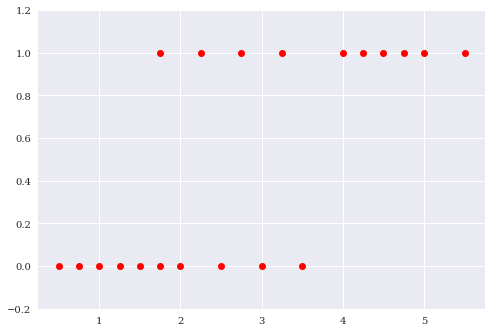

In [101]:
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2)
# plt.savefig('../../images/ch05/ml_plot_1.png')

In [102]:
reg = np.polyfit(hours, success, deg=1)

(-0.2, 1.2)

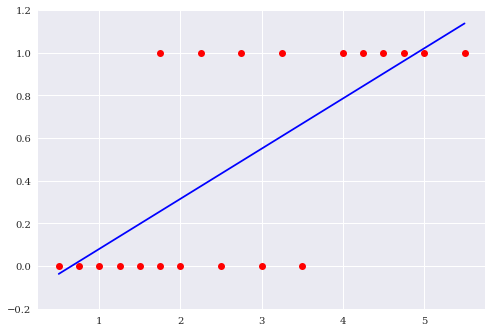

In [103]:
plt.plot(hours, success, 'ro')
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2)
# plt.savefig('../../images/ch05/ml_plot_2.png')

In [104]:
from sklearn import linear_model

In [105]:
lm = linear_model.LogisticRegression()

In [106]:
hrs = hours.reshape(1, -1).T

In [107]:
lm.fit(hrs, success)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
prediction = lm.predict(hrs)

(-0.2, 1.2)

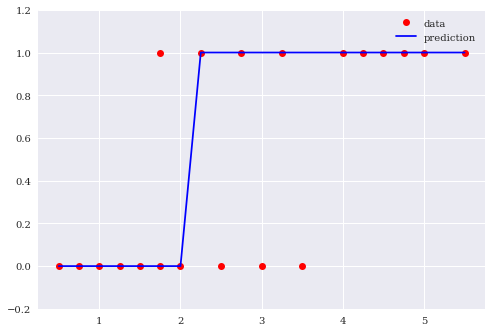

In [109]:
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0)
plt.ylim(-0.2, 1.2)
# plt.savefig('../../images/ch05/ml_plot_3.png')

In [110]:
prob = lm.predict_proba(hrs)

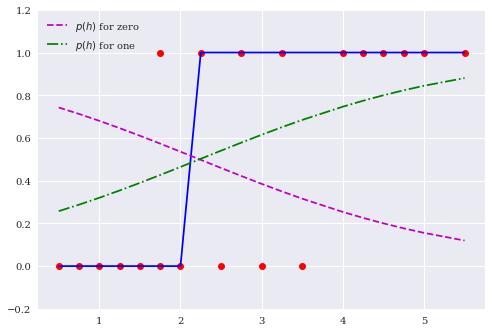

In [111]:
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--', label='$p(h)$ for zero')
plt.plot(hours, prob.T[1], 'g-.', label='$p(h)$ for one')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0)
# plt.savefig('../../images/ch05/ml_plot_4.png')

### Using Logistic Regression to Predict Market Direction

In [112]:
import pandas as pd

In [113]:
h5 = pd.HDFStore('../data/equities.h5', 'r')

In [114]:
data = pd.DataFrame(h5['data']['^GSPC'])

In [115]:
h5.close()

In [116]:
data = data[(data.index > '2010-1-1') & (data.index < '2016-11-1')]

In [117]:
data.rename(columns={'^GSPC': 'price'}, inplace=True)

In [118]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [119]:
data.dropna(inplace=True)

In [120]:
lags = 3

In [121]:
m = np.zeros((lags + 1, len(data) - lags))

In [122]:
for i in range(lags + 1):
    if i == lags:
        m[i] = data.returns.values[i:]
    else:
        m[i] = data.returns.values[i:i - lags]

In [123]:
from sklearn import linear_model

In [124]:
lm = linear_model.LogisticRegression(C=1e6)

In [125]:
lm.fit(m[:lags].T, np.sign(m[lags]))

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [126]:
data['prediction'] = np.nan

In [127]:
data['prediction'].ix[lags:] = lm.predict(m[:lags].T)

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [128]:
data['prediction'].value_counts()

 1.0    1664
-1.0      52
Name: prediction, dtype: int64

In [129]:
hits = np.sign(data['returns'].ix[lags:] *
               data['prediction'].ix[lags:]).value_counts()

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [130]:
hits

 1.0    926
-1.0    790
dtype: int64

In [131]:
hits.values[0] / sum(hits)

0

In [132]:
data['strategy'] = data['prediction'] * data['returns']

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


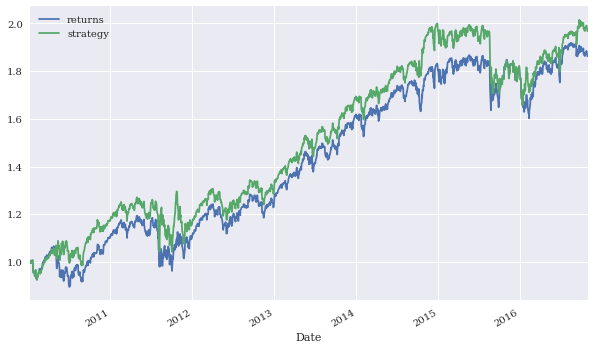

In [133]:
data[['returns', 'strategy']].ix[lags:].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6))
# plt.savefig('../../images/ch05/ml_plot_5.png')

In [134]:
lags = 15

In [135]:
m = np.zeros((lags + 1, len(data) - lags))

In [136]:
for i in range(lags + 1):
    if i == lags:
        m[i] = data.returns.values[i:]
    else:
        m[i] = data.returns.values[i:i - lags]

In [137]:
lm.fit(m[:lags].T, np.sign(m[lags]))

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [138]:
data['prediction'] = np.nan

In [139]:
data['prediction'].ix[lags:] = lm.predict(m[:lags].T)

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [140]:
data['prediction'].value_counts()

 1.0    1422
-1.0     282
Name: prediction, dtype: int64

In [141]:
hits = np.sign(data['returns'].ix[lags:] *
               data['prediction'].ix[lags:]).value_counts()

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [142]:
hits

 1.0    938
-1.0    766
dtype: int64

In [143]:
hits.values[0] / sum(hits)

0

In [144]:
data['strategy'] = data['prediction'] * data['returns']

J:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


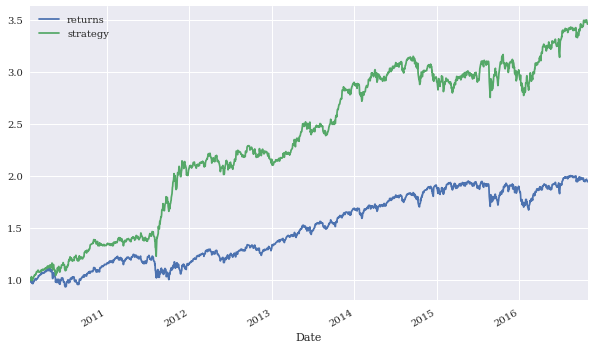

In [145]:
data[['returns', 'strategy']].ix[lags:].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6))
# plt.savefig('../../images/ch05/ml_plot_6.png')

### Generalizing the Approach

In [148]:
import ScikitVectorBacktester as SCI

In [149]:
#from importlib import reload

In [150]:
#reload(SCI)

In [151]:
scibt = SCI.ScikitVectorBacktester('^GSPC', '2010-1-1', '2016-10-31',
                                   10000, 0.0, 'logistic')

In [152]:
scibt.run_strategy('2010-1-1', '2016-10-31',
                   '2010-1-1', '2016-10-31', lags=15)

(36124.96, 17356.84)

In [153]:
scibt.run_strategy('2010-1-1', '2013-12-31',
                   '2014-1-1', '2016-10-31', lags=15)

(12121.64, 617.34)

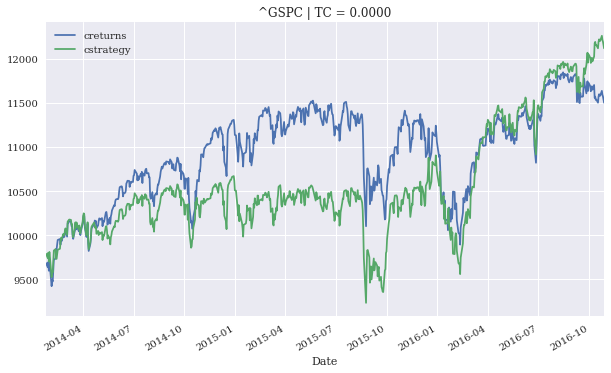

In [154]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_7.png')

In [155]:
scibt = SCI.ScikitVectorBacktester('^GSPC', '2010-1-1', '2016-10-31',
                                   10000, 0.001, 'logistic')

In [156]:
scibt.run_strategy('2010-1-1', '2013-12-31',
                   '2014-1-1', '2016-10-31', lags=15)

(11045.16, -459.14)

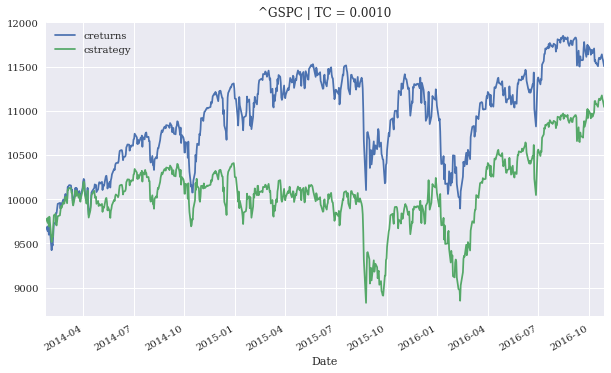

In [157]:
scibt.plot_results()
# plt.savefig('../../images/ch05/ml_plot_8.png')

## Using Deep Learning for Market Movement Prediction

#### The Simple Classification Problem Revisited 

In [158]:
import numpy as np
import pandas as pd

In [159]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])  # <1>

In [160]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                    0, 1, 1, 1, 1, 1, 1]) 

In [161]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
hours      20 non-null float64
success    20 non-null int32
dtypes: float64(1), int32(1)
memory usage: 276.0 bytes


In [163]:
import tensorflow as tf

ImportError: No module named tensorflow

In [ ]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
fc = [tf.contrib.layers.real_valued_column('hours', dimension=1)]

In [ ]:
model = tf.contrib.learn.DNNClassifier(feature_columns=fc,
                                            n_classes=2,
                                            hidden_units=[100])

In [ ]:
def get_data():
    feature_cols = {'hours': tf.constant(data['hours'].values)}
    labels = tf.constant(data['success'].values, shape=[data['success'].size, 1])
    return feature_cols, labels

In [ ]:
model.fit(input_fn=get_data, steps=100)

In [ ]:
data['prediction'] = list(model.predict(input_fn=get_data))

In [ ]:
%matplotlib inline
from pylab import plt
plt.style.use('seaborn')

In [ ]:
data.tail()

In [ ]:
data.plot(x='hours', y=['success', 'prediction'],
          style=['ro', 'b-'], ylim=[-.1, 1.1]);
# plt.savefig('../../images/ch05/dl_plot_1.png')

### Using Deep Neural Networks to Predict Market Direction

In [ ]:
h5 = pd.HDFStore('../data/equities.h5', 'r')

In [ ]:
data = pd.DataFrame(h5['data']['^GSPC'])

In [ ]:
h5.close()

In [ ]:
data = data[(data.index > '2010-1-1') & (data.index < '2016-11-1')]

In [ ]:
data.rename(columns={'^GSPC': 'price'}, inplace=True)

In [ ]:
data['returns'] = np.log(data / data.shift(1))

In [ ]:
lags = range(1, 6)

In [ ]:
for i in lags:
    data['ret_%s' % i] = np.sign(data['returns'].shift(i))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.round(4).tail()

In [ ]:
cutoff = '2015-1-1'

In [ ]:
training_data = data[data.index < cutoff].copy()

In [ ]:
test_data = data[data.index >= cutoff].copy()

In [ ]:
def get_data():
    feature_cols = {'ret_%s' % i: tf.constant(idata['ret_%s' % i].values)
                    for i in lags}
    labels = tf.constant((idata['returns'] > 0).astype(int).values,
                         shape=[idata['returns'].size, 1])
    return feature_cols, labels

In [ ]:
fc = [tf.contrib.layers.real_valued_column('ret_%s' % i, dimension=1) 
                   for i in lags]

In [ ]:
model = tf.contrib.learn.DNNClassifier(feature_columns=fc,
                    n_classes=2, hidden_units=[100, 100])

In [ ]:
idata = training_data

In [ ]:
model.fit(input_fn=get_data, steps=500)

In [ ]:
model.evaluate(input_fn=get_data, steps=1)

In [ ]:
pred = np.array(list(model.predict(input_fn=get_data)))

In [ ]:
pred[:20]

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
training_data['strategy'] = training_data['prediction'] * \
                            training_data['returns']

In [ ]:
training_data[['returns', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_2.png')

In [ ]:
idata = test_data

In [ ]:
model.evaluate(input_fn=get_data, steps=1)

In [ ]:
pred = np.array(list(model.predict(input_fn=get_data)))

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_data['strategy'] = test_data['prediction'] * \
                        test_data['returns']

In [ ]:
test_data[['returns', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_3.png')

### Adding Different Types of Features

In [ ]:
def transform(x):
    if x < -0.0015: return -2
    elif x < 0: return -1
    elif x > 0.0015: return 2
    else: return 1

In [ ]:
data['momentum'] = data['returns'].rolling(3).mean().shift(1)

In [ ]:
data['momentum'] = data['momentum'].apply(transform)

In [ ]:
data.round(4).tail()

In [ ]:
fc = [tf.contrib.layers.real_valued_column('ret_%s' % i, dimension=1) 
                   for i in lags]
fc.append(tf.contrib.layers.real_valued_column('momentum', dimension=1))

In [ ]:
def get_data():
    feature_cols = {'ret_%s' % i: tf.constant(idata['ret_%s' % i].values)
                    for i in lags}
    feature_cols['momentum'] = tf.constant(idata['momentum'].values)
    labels = tf.constant((idata['returns'] > 0).astype(int).values,
                         shape=[idata['returns'].size, 1])
    return feature_cols, labels

In [ ]:
model = tf.contrib.learn.DNNClassifier(feature_columns=fc,
                    n_classes=2, hidden_units=[100, 100])

In [ ]:
training_data = data[data.index < cutoff].copy()

In [ ]:
test_data = data[data.index >= cutoff].copy()

In [ ]:
idata = training_data

In [ ]:
model.fit(input_fn=get_data, steps=500)

In [ ]:
model.evaluate(input_fn=get_data, steps=1)

In [ ]:
pred = np.array(list(model.predict(input_fn=get_data)))

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
training_data['strategy'] = training_data['prediction'] * \
                            training_data['returns']

In [ ]:
training_data[['returns', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_4.png')

In [ ]:
idata = test_data

In [ ]:
model.evaluate(input_fn=get_data, steps=1)

In [ ]:
pred = np.array(list(model.predict(input_fn=get_data)))

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [ ]:
test_data['strategy'] = test_data['prediction'] * \
                        test_data['returns']

In [ ]:
test_data[['returns', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch05/dl_plot_5.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>